In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the new sets
print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)

print("\nValidation set shape:", x_val.shape)
print("Validation set shape:", y_val.shape)

print("\nTest set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training set shape: (48000, 28, 28)
Training labels shape: (48000,)

Validation set shape: (12000, 28, 28)
Validation set shape: (12000,)

Test set shape: (10000, 28, 28)
Test labels shape: (10000,)


In [ ]:
# #Normalize the data

x_train = (x_train - 0.2860) / 0.3530
x_val = (x_val - 0.2860) / 0.3530
x_test = (x_test - 0.2860) / 0.3530


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train[0].shape

(28, 28, 1)

# Addition of a dropout layer with batch-size =16

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Add dropout layer
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

cnn.compile(optimizer=Adam(learning_rate=0.0001),  # Adjust learning rate
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
baseline_cnn = cnn.fit(x_train, y_train,
                        validation_data=(x_val, y_val),
                        epochs=50,
                        batch_size=16)  # Experiment with smaller batch size

Epoch 1/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.2809 - loss: 4.3160 - val_accuracy: 0.6768 - val_loss: 0.9050
Epoch 2/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.5357 - loss: 1.2955 - val_accuracy: 0.7556 - val_loss: 0.6836
Epoch 3/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6002 - loss: 1.0617 - val_accuracy: 0.7850 - val_loss: 0.5896
Epoch 4/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.6586 - loss: 0.8724 - val_accuracy: 0.8260 - val_loss: 0.5220
Epoch 5/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7079 - loss: 0.7780 - val_accuracy: 0.8363 - val_loss: 0.4860
Epoch 6/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7386 - loss: 0.6933 - val_accuracy: 0.8441 - val_loss: 0.4574
Epoch 7/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7694 - loss: 0.6000 - val_accuracy: 0.8610 - val_loss: 0.4025
Epoch 8/50
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7867 - loss: 0.5

Final training accuracy: 0.9336
Final validation accuracy: 0.9044
Final training loss: 0.1678
Final validation loss: 0.4087


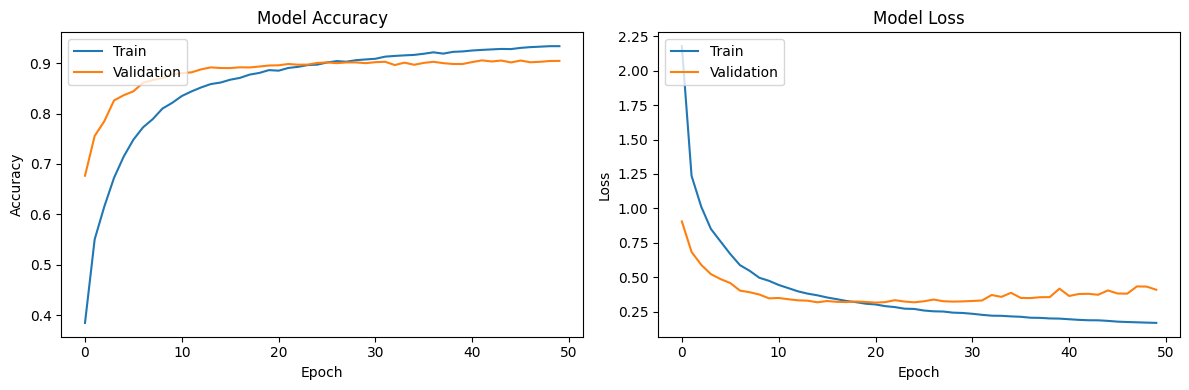

In [ ]:
print(f"Final training accuracy: {baseline_cnn.history['accuracy'][-1]:.4f}")
print(f"Final validation accuracy: {baseline_cnn.history['val_accuracy'][-1]:.4f}")
print(f"Final training loss: {baseline_cnn.history['loss'][-1]:.4f}")
print(f"Final validation loss: {baseline_cnn.history['val_loss'][-1]:.4f}")

import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(baseline_cnn.history['accuracy'])
plt.plot(baseline_cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(baseline_cnn.history['loss'])
plt.plot(baseline_cnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()